## Tugas Mata Kuliah Data Mining (Exploratory Data Analysis)
## Nama anggota
### 1. Hanny Nurrohmah                  (11160940000040)
### 2. Maisy Amelia Silvani                          (11160940000066)
### 3. Indah Tri Nurlita                      (11160940000082)
### 4. Siti Aenun Naimatul Jannah  (11170940000004)
### 5. Irman Suryana                         (11170940000018)
### 6. Gery Ferdian Aly                      (11170940000039)
### 7. Tira Amalia                               (11170940000042)
### 8. Ujang Hasanudin                     (11170940000062)

# 1. Data Corona di Indonesia

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
%matplotlib inline

In [6]:
cases = pd.read_csv('data/cases.csv') 
cases.head()

,date,new_tested,acc_tested,new_confirmed,acc_confirmed,acc_negative,being_checked,isolated,new_released,acc_released,new_deceased,acc_deceased,positive_rate,negative_rate,decease_rate,release_rate,dailypositive_rate
0,2-Mar-20,0,339,2,2,335,2,2,0,0,0,0,0.59%,98.82%,0.00%,0.00%,0.00%
1,3-Mar-20,2,341,0,2,337,2,2,0,0,0,0,0.59%,98.83%,0.00%,0.00%,0.00%
2,4-Mar-20,31,372,0,2,356,14,2,0,0,0,0,0.54%,95.70%,0.00%,0.00%,0.00%
3,5-Mar-20,16,388,0,2,371,15,2,0,0,0,0,0.52%,95.62%,0.00%,0.00%,0.00%
4,6-Mar-20,62,450,2,4,422,24,4,0,0,0,0,0.89%,93.78%,0.00%,0.00%,3.23%


In [7]:
cases.drop("being_checked",axis=1, inplace=True)

In [8]:
type(cases)

pandas.core.frame.DataFrame

In [9]:
B,K=cases.shape
print('baris=',B,',kolom=',K)

baris= 30 ,kolom= 16


In [10]:
cases.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 16 columns):
date                  30 non-null object
new_tested            30 non-null int64
acc_tested            30 non-null int64
new_confirmed         30 non-null int64
acc_confirmed         30 non-null int64
acc_negative          30 non-null int64
isolated              30 non-null int64
new_released          30 non-null int64
acc_released          30 non-null int64
new_deceased          30 non-null int64
acc_deceased          30 non-null int64
positive_rate         30 non-null object
negative_rate         30 non-null object
decease_rate          30 non-null object
release_rate          30 non-null object
dailypositive_rate    30 non-null object
dtypes: int64(10), object(6)
memory usage: 3.8+ KB


In [11]:
cases['date']=cases['date'].astype('datetime64')
cases.dtypes

date                  datetime64[ns]
new_tested                     int64
acc_tested                     int64
new_confirmed                  int64
acc_confirmed                  int64
acc_negative                   int64
isolated                       int64
new_released                   int64
acc_released                   int64
new_deceased                   int64
acc_deceased                   int64
positive_rate                 object
negative_rate                 object
decease_rate                  object
release_rate                  object
dailypositive_rate            object
dtype: object

In [22]:
print(cases.isnull().sum())

date                  0
new_tested            0
acc_tested            0
new_confirmed         0
acc_confirmed         0
acc_negative          0
isolated              0
new_released          0
acc_released          0
new_deceased          0
acc_deceased          0
positive_rate         0
negative_rate         0
decease_rate          0
release_rate          0
dailypositive_rate    0
dtype: int64


Tidak ada missing value dalam data.

In [12]:
cases_num=cases.select_dtypes(include=['datetime64','int64'])
cases_num.head()

,date,new_tested,acc_tested,new_confirmed,acc_confirmed,acc_negative,isolated,new_released,acc_released,new_deceased,acc_deceased
0,2020-03-02,0,339,2,2,335,2,0,0,0,0
1,2020-03-03,2,341,0,2,337,2,0,0,0,0
2,2020-03-04,31,372,0,2,356,2,0,0,0,0
3,2020-03-05,16,388,0,2,371,2,0,0,0,0
4,2020-03-06,62,450,2,4,422,4,0,0,0,0


In [13]:
cases_num[['new_tested','new_confirmed','isolated','new_released','new_deceased']].describe()

,new_tested,new_confirmed,isolated,new_released,new_deceased
count,30.000000,30.000000,30.000000,30.000000,30.000000
mean,218.133333,50.933333,346.266667,2.700000,4.533333
std,283.932937,48.962993,414.461673,3.752241,5.624658
min,0.000000,0.000000,2.000000,0.000000,0.000000
25%,60.500000,3.250000,21.000000,0.000000,0.000000
50%,129.500000,36.500000,138.500000,1.000000,2.000000
75%,296.500000,97.750000,575.000000,4.000000,7.750000
max,1439.000000,153.000000,1311.000000,13.000000,20.000000


## Keterangan
new tested = jumlah orang yang dites Covid-19 per hari

new confirmed = jumlah kasus yang positif per hari

isolated = akumulasi orang yang terisolasi akibat Covid-19

new released = jumlah kasus sembuh per hari

new deceased = jumlah kasus kematian per hari


acc = akumulasi jumlah

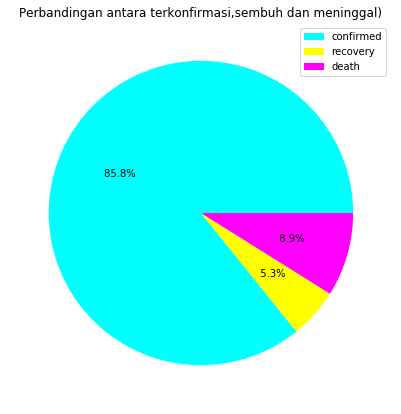

In [58]:
plt.subplots(figsize=(7,7))
alyze=cases_num[['new_confirmed','new_released','new_deceased']].sum()
alyze['new_confirmed']=alyze['new_confirmed']-alyze['new_released']-alyze['new_deceased']
plt.pie(alyze,autopct='%5.01f%%',colors=['cyan','yellow','magenta'])
plt.legend(labels=['confirmed','recovery','death'])
plt.title('Perbandingan antara positif,sembuh dan meninggal)')
plt.show()

Dari piechart terlihat bahwa di Indonesia per awal Maret 2020 terdapat sekitat 85.8% masyarakat Indonesia yang terinfeksi positif terhadap virus Corona. Untuk jumlah pasien yang sembuh dimulai per awal Maret 2020 sampai akhir Maret 2020 terdapat sekitar 5.3%. Dan untuk jumlah penderita yang meninggal terdapat sekitar 8.3%. Hal Ini menunjukkan tingkat kematian masih lebih tinggi dibandingkan tingkat kesembuhan di Indonesia.

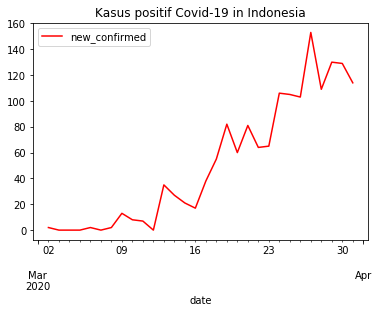

In [61]:
cases_num.plot(kind='line',x='date',y='new_confirmed',color='red')
plt.title('Kasus positif Covid-19 in Indonesia')
plt.show()

Penyebaran Covid-19 di Indonesia terjadi pada awal Maret 2020 dan perkembangannya cukup pesat dari tanggal 16 Maret 2020 sampai 21 Maret 2020 yaitu sekitar 60 orang. Jumlah terbanyak pada terkonfirmasi positif yaitu pada tanggal 26-28 Maret 2020. Dari grafik cenderung menaik dari hari ke hari untuk pasien yang terkonfirmasi positif Covid-19. Maka penyebaran virus ini sudah ada kemungkinan sejak bulan Maret 2020.

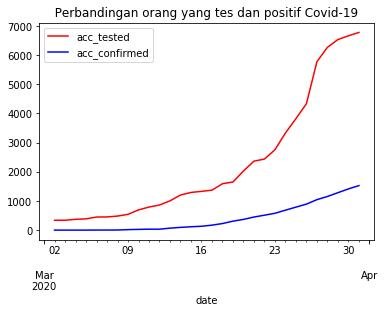

In [62]:
ax = plt.gca()

cases_num.plot(kind='line',x='date',y='acc_tested',color='red' ,ax=ax)
cases_num.plot(kind='line',x='date',y='acc_confirmed', color='blue', ax=ax)
plt.title('  Perbandingan orang yang tes dan positif Covid-19  ')
plt.show()

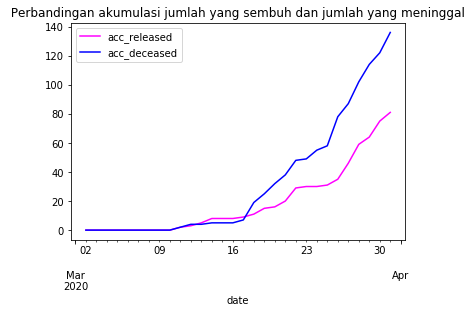

In [63]:
ax = plt.gca()

cases_num.plot(kind='line',x='date',y='acc_released',color='magenta' ,ax=ax)
cases_num.plot(kind='line',x='date',y='acc_deceased', color='blue', ax=ax)
plt.title(' Perbandingan akumulasi jumlah yang sembuh dan jumlah yang meninggal ')
plt.show()

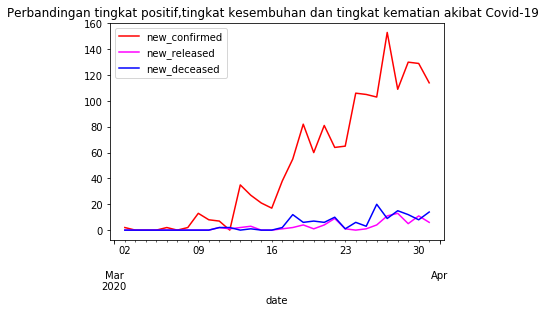

In [53]:
ax = plt.gca()

cases_num.plot(kind='line',x='date',y='new_confirmed',color='red' ,ax=ax)
cases_num.plot(kind='line',x='date',y='new_released', color='magenta', ax=ax)
cases_num.plot(kind='line',x='date',y='new_deceased', color='blue', ax=ax)
plt.title('Perbandingan tingkat positif,tingkat kesembuhan dan tingkat kematian akibat Covid-19  ')
plt.show()

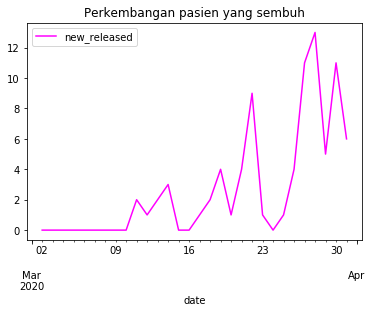

In [52]:
cases.plot(kind='line',x='date',y='new_released',color='magenta')
plt.title('Perkembangan pasien yang sembuh')
plt.show()

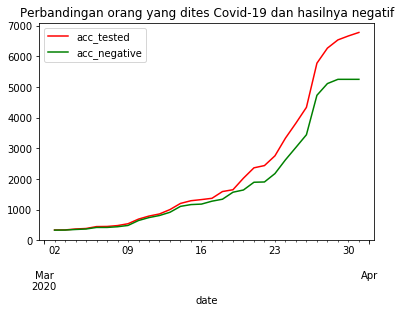

In [51]:
ax = plt.gca()

cases.plot(kind='line',x='date',y='acc_tested',color='red' ,ax=ax)
cases.plot(kind='line',x='date',y='acc_negative', color='green', ax=ax)
plt.title('Perbandingan orang yang dites Covid-19 dan hasilnya negatif')
plt.show()

Peningkatan kasus Covid-19 di Indonesia cukup signifikan per awal Maret 2020 hingga akhir Maret 2020 yaitu sebesar 1528 kasus. Rata-rata ada 100 orang per hari yang terkonfirmasi positif Covid-19. Namun ada satu hal yang dikhawatirkan yaitu terus meningkatnya kasus positif dan melambatnya jumlah orang yang sembuh dari Covid-19. Dapat dilihat bahwa, pasien sembuh terbanyak yaitu pada 29 Maret 2020 sebesar 12 orang. Hal ini dikhawatirkan akan makin banyak lagi orang yang terpapar Covid-19 mengingat presentase masyarakat Indonesia yang rentan sebesar 81%. Dan juga tingkat kesembuhannya yang cukup rendah yaitu 0.9%. Pemerintah Indonesia harus benar-benar menerapkan karantina wilayah demi memutus mata rantai Covid-19, sehingga tingkat kesembuhan para pasien bisa lebih meningkat lagi. 

Hipotesis adalah kasus terkonfirmasi positif Covid-19 di Indonesia semakin meningkat tajam sampai bulan April 2020 jika tidak ada pencegahan terutama dari pemerintah.

# 2. Kasus Corona di Hubei, China 

In [23]:
china_case=pd.read_csv('data/china case.csv')
china_case.head()

,Date,Confirmed,Death,Recovery
0,1/22/2020,444,17,28
1,1/23/2020,444,17,28
2,1/24/2020,549,24,31
3,1/25/2020,761,40,32
4,1/26/2020,1058,52,42


In [24]:
china_case.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65 entries, 0 to 64
Data columns (total 4 columns):
Date         65 non-null object
Confirmed    65 non-null int64
Death        65 non-null int64
Recovery     65 non-null int64
dtypes: int64(3), object(1)
memory usage: 2.1+ KB


In [25]:
china_case['Date']=china_case['Date'].astype('datetime64')
china_case.dtypes

Date         datetime64[ns]
Confirmed             int64
Death                 int64
Recovery              int64
dtype: object

In [36]:
print(china_case.isnull().sum())

Date         0
Confirmed    0
Death        0
Recovery     0
dtype: int64


Tidak ada missing value dalam data.

In [28]:
china_case.describe()

,Confirmed,Death,Recovery
count,65.000000,65.000000,65.000000
mean,47665.969231,1913.815385,24026.630769
std,25971.811084,1186.583171,23285.556992
min,444.000000,17.000000,28.000000
25%,24953.000000,699.000000,1115.000000
50%,64084.000000,2346.000000,15343.000000
75%,67760.000000,3024.000000,47743.000000
max,67801.000000,3169.000000,61201.000000


## Keterangan
Confirmed = akumulasi jumlah kasus positif

Death = akumulasi jumlah kasus kematian

Recovery = akumulasi jumlah kasus sembuh


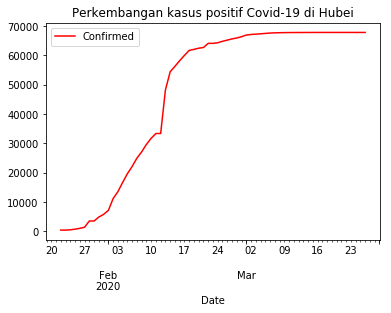

In [64]:
china_case.plot(kind='line',x='Date',y='Confirmed',color='red')
plt.title('Perkembangan kasus positif Covid-19 di Hubei')
plt.show()

Terlihat bahwa perkembangan penyebaran Covid-19 di provinsi Wubei melonjak tajam pada awal Maret 2020 sampai pertengahan Februari 2020. Namun sudah cukup stabil pada Awal Maret 2020.Hal ini mengindikasi bahwa pada bulan April cenderung kasus yang terkonfirmasi positif akan menurun.

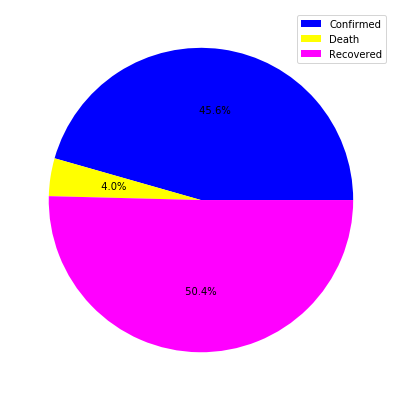

In [30]:
plt.subplots(figsize=(7,7))
alyze=china_case[['Confirmed','Death','Recovery']].sum()
alyze['Confirmed']=alyze['Confirmed']-alyze['Death']-alyze['Recovery']
plt.pie(alyze,autopct='%5.01f%%',colors=['blue','yellow','magenta'])
plt.legend(labels=['Confirmed','Death','Recovered'])
plt.show()

Tingkat kesembuhan pasien Covid-19 di kota Wubei cenderung lebih tinggi dibandingkan tigkat pasien yang terkonfirmasi positif Covid-19. Dan itu juga didukung dengan tingkat kematian yang cukup rendah yaitu sekitar 4%. Hal ini berarti bahwa dapat diprediksi 3 bulan kedepan, kota ini kan terus menekan laju penyebaran Covid-19.

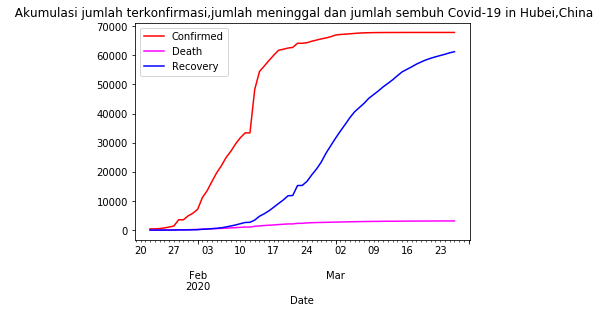

In [65]:
ax = plt.gca()

china_case.plot(kind='line',x='Date',y='Confirmed',color='red' ,ax=ax)
china_case.plot(kind='line',x='Date',y='Death', color='magenta', ax=ax)
china_case.plot(kind='line',x='Date',y='Recovery', color='blue', ax=ax)
plt.title('  Akumulasi jumlah terkonfirmasi,jumlah meninggal dan jumlah sembuh Covid-19 in Hubei,China ')
plt.show()

# 3. Kesimpulan
Penularan Covid-19 diawali dari provinsi Hubei di China yang sampai menembus jumlah kasus positif sebesar 67810 kasus. Namun walau kasus positif cukup tinggi, jumlah pasien yang tersembuhkan cukuplah tinggi juga yaitu sebesar 61210 kasus. Nampak juga penambahan jumlah kasus positif di China sudah cenderung stabil pada awal Maret 2020. Lain hal pada awal Febuari sampai akhir Februari yang melonjak tajam. Ada kemungkinan bahwa pada bulan April 2020, terjadi kasus penurunan yang cukup signifikan di Hubei, China.

Lain halnya dengan Indonesia yang belum stabil dalam kasus yang terkonfirmasi positif Covid-19 dan tingkat kesembuhannya yang cukup rendah. Dapat diprediksi juga bahwa, pada tren peningkatan kasus terkonfirmasi positif ini akan terus berlangsung kecuali jika pemerintah Indonesia meniru pemerintah China dalam menekan laju penyebaran Covid-19. Tetapi perlu diingat juga bahwa kebijakan yang diatur haruslah sesuai dengan kebiasaan dan budaya bangsa Indonesia. Jangan sampai pemerintah salah mengambil kebijakan. 

Hipotesis dari EDA diatas adalah kedisplinan masyarakat terhadap kebijakan pemerintah kunci pengurangan penyebaran Covid-19